In [1]:
# Use seaborn for pairplot
!pip install seaborn

You are using pip version 9.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

1.14.0


In [3]:
column_names = ['DAYS_TAKEN','CUSTOMER', 'ZTERM', 'CASH_DISCOUNT_DAY1', 'CASH_DISCOUNT_DAY2', 'CASH_DISCOUNT_PER', 
                'DUE_DAYS_PLUS', 'T052_CASH_DISCOUNT_PER_01', 'AMOUNT_PERCENTAGE_CREDIT_LIMIT', 
               'T052_CASH_DISCOUNT_DAY1', 'T052_CASH_DISCOUNT_DAY2', 'DAYS_OVER_NET_DUE_DATE', 
                'DAYS_BEYOND_DISCOUNT_2', 'CUSTOMER_CREDIT_LIMIT', 'DISCOUNT_AMOUNT_ELIGIBLE',
               'AMOUNT_BSAD']

In [4]:
df = pd.read_csv('lra.csv',
        header=0,
        na_values = '0',
        usecols=column_names,
        comment='\t',
        skipinitialspace=True)
df = df.replace(0, np.nan)
dataset = df.copy()
dataset.tail()

,DAYS_TAKEN,CUSTOMER,ZTERM,CASH_DISCOUNT_DAY1,CASH_DISCOUNT_DAY2,CASH_DISCOUNT_PER,DUE_DAYS_PLUS,T052_CASH_DISCOUNT_PER_01,AMOUNT_PERCENTAGE_CREDIT_LIMIT,T052_CASH_DISCOUNT_DAY1,T052_CASH_DISCOUNT_DAY2,DAYS_OVER_NET_DUE_DATE,DAYS_BEYOND_DISCOUNT_2,CUSTOMER_CREDIT_LIMIT,DISCOUNT_AMOUNT_ELIGIBLE,AMOUNT_BSAD
8094,44,3000060215,Z231,40.0,60.0,1.5,60.0,1.5,0.53,40.0,60.0,-16.0,-16.0,60000,319.99,319.99
8095,13,3000121110,ZD45,14.0,30.0,1.5,30.0,1.5,0.03,14.0,30.0,-17.0,-17.0,200000,77.35,77.35
8096,31,3000121918,ZD28,10.0,30.0,1.5,30.0,1.5,0.23,10.0,30.0,1.0,1.0,160000,381.16,381.16
8097,99,3000253226,Z233,100.0,120.0,1.5,120.0,1.5,0.35,100.0,120.0,-21.0,-21.0,1100000,3923.95,3923.95
8098,28,3000121301,Z201,30.0,60.0,1.5,60.0,1.5,2.73,30.0,60.0,-32.0,-32.0,50000,1368.50,1368.50


In [5]:
dataset.isna().sum()

DAYS_TAKEN                          0
CUSTOMER                            0
ZTERM                               0
CASH_DISCOUNT_DAY1                  1
CASH_DISCOUNT_DAY2                  1
CASH_DISCOUNT_PER                   1
DUE_DAYS_PLUS                       1
T052_CASH_DISCOUNT_PER_01           1
AMOUNT_PERCENTAGE_CREDIT_LIMIT    220
T052_CASH_DISCOUNT_DAY1             1
T052_CASH_DISCOUNT_DAY2             1
DAYS_OVER_NET_DUE_DATE             43
DAYS_BEYOND_DISCOUNT_2             43
CUSTOMER_CREDIT_LIMIT               0
DISCOUNT_AMOUNT_ELIGIBLE            1
AMOUNT_BSAD                         0
dtype: int64

In [6]:
dataset = dataset.dropna()

In [7]:
ZTERM = dataset.pop('ZTERM')

In [8]:
#dataset['PT00'] = (ZTERM == 'PT00')*1.0
dataset['Z201'] = (ZTERM == 'Z201')*1.0
dataset['Z203'] = (ZTERM == 'Z203')*1.0
dataset['Z225'] = (ZTERM == 'Z225')*1.0
dataset['Z226'] = (ZTERM == 'Z226')*1.0
dataset['Z231'] = (ZTERM == 'Z231')*1.0
dataset['Z232'] = (ZTERM == 'Z232')*1.0
dataset['Z233'] = (ZTERM == 'Z233')*1.0
dataset['Z234'] = (ZTERM == 'Z234')*1.0
dataset['Z281'] = (ZTERM == 'Z281')*1.0
dataset['Z286'] = (ZTERM == 'Z286')*1.0
dataset['ZD28'] = (ZTERM == 'ZD28')*1.0
dataset['ZD43'] = (ZTERM == 'ZD43')*1.0
dataset['ZD45'] = (ZTERM == 'ZD45')*1.0
dataset['ZD48'] = (ZTERM == 'ZD48')*1.0
dataset['ZD50'] = (ZTERM == 'ZD50')*1.0
dataset['ZD91'] = (ZTERM == 'ZD91')*1.0
dataset['ZDA4'] = (ZTERM == 'ZDA4')*1.0
dataset['ZDA5'] = (ZTERM == 'ZDA5')*1.0
dataset.tail()

,DAYS_TAKEN,CUSTOMER,CASH_DISCOUNT_DAY1,CASH_DISCOUNT_DAY2,CASH_DISCOUNT_PER,DUE_DAYS_PLUS,T052_CASH_DISCOUNT_PER_01,AMOUNT_PERCENTAGE_CREDIT_LIMIT,T052_CASH_DISCOUNT_DAY1,T052_CASH_DISCOUNT_DAY2,...,Z281,Z286,ZD28,ZD43,ZD45,ZD48,ZD50,ZD91,ZDA4,ZDA5
8094,44,3000060215,40.0,60.0,1.5,60.0,1.5,0.53,40.0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8095,13,3000121110,14.0,30.0,1.5,30.0,1.5,0.03,14.0,30.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8096,31,3000121918,10.0,30.0,1.5,30.0,1.5,0.23,10.0,30.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8097,99,3000253226,100.0,120.0,1.5,120.0,1.5,0.35,100.0,120.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8098,28,3000121301,30.0,60.0,1.5,60.0,1.5,2.73,30.0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
len(dataset)

7836

In [10]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [11]:
train_dataset.shape

(6269, 33)

In [12]:
test_dataset.shape

(1567, 33)

In [13]:
#std cannot be 0
train_stats = train_dataset.describe()
train_stats.pop("DAYS_TAKEN")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
CUSTOMER,6269.0,3.000136e+09,104859.043458,3.000039e+09,3.000060e+09,3.000062e+09,3.000201e+09,3.000416e+09
CASH_DISCOUNT_DAY1,6269.0,2.757234e+01,29.035436,1.000000e+01,1.000000e+01,1.000000e+01,4.000000e+01,1.000000e+02
CASH_DISCOUNT_DAY2,6269.0,4.652895e+01,29.591103,3.000000e+01,3.000000e+01,3.000000e+01,6.000000e+01,1.200000e+02
CASH_DISCOUNT_PER,6269.0,1.530547e+00,0.189685,1.000000e+00,1.500000e+00,1.500000e+00,1.500000e+00,3.000000e+00
DUE_DAYS_PLUS,6269.0,4.652895e+01,29.591103,3.000000e+01,3.000000e+01,3.000000e+01,6.000000e+01,1.200000e+02
T052_CASH_DISCOUNT_PER_01,6269.0,1.530547e+00,0.189685,1.000000e+00,1.500000e+00,1.500000e+00,1.500000e+00,3.000000e+00
AMOUNT_PERCENTAGE_CREDIT_LIMIT,6269.0,2.468338e+00,6.016645,1.000000e-02,1.200000e-01,4.700000e-01,1.960000e+00,1.202600e+02
T052_CASH_DISCOUNT_DAY1,6269.0,2.757234e+01,29.035436,1.000000e+01,1.000000e+01,1.000000e+01,4.000000e+01,1.000000e+02
T052_CASH_DISCOUNT_DAY2,6269.0,4.652895e+01,29.591103,3.000000e+01,3.000000e+01,3.000000e+01,6.000000e+01,1.200000e+02
DAYS_OVER_NET_DUE_DATE,6269.0,-1.845286e+01,6.108873,-1.110000e+02,-2.100000e+01,-2.000000e+01,-1.700000e+01,3.400000e+01


In [14]:
# Label: DAYS_TAKEN
train_labels = train_dataset.pop('DAYS_TAKEN')
test_labels = test_dataset.pop('DAYS_TAKEN')

In [15]:
#  ************************  TRAIN *****************************************

In [16]:
# TRAIN 
train_labels.head(5)

7472     13
3596      9
2877    100
4553     10
6275     12
Name: DAYS_TAKEN, dtype: int64

In [17]:
# TRAIN 
train_dataset.head(5)

,CUSTOMER,CASH_DISCOUNT_DAY1,CASH_DISCOUNT_DAY2,CASH_DISCOUNT_PER,DUE_DAYS_PLUS,T052_CASH_DISCOUNT_PER_01,AMOUNT_PERCENTAGE_CREDIT_LIMIT,T052_CASH_DISCOUNT_DAY1,T052_CASH_DISCOUNT_DAY2,DAYS_OVER_NET_DUE_DATE,...,Z281,Z286,ZD28,ZD43,ZD45,ZD48,ZD50,ZD91,ZDA4,ZDA5
7472,3000197154,14.0,30.0,1.5,30.0,1.5,0.23,14.0,30.0,-17.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3596,3000060187,10.0,30.0,1.5,30.0,1.5,0.01,10.0,30.0,-21.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2877,3000060164,100.0,120.0,1.5,120.0,1.5,2.18,100.0,120.0,-20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4553,3000057482,10.0,30.0,1.5,30.0,1.5,4.41,10.0,30.0,-20.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6275,3000060093,10.0,30.0,1.5,30.0,1.5,5.75,10.0,30.0,-18.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
#  ************************  TEST *****************************************

In [19]:
# TEST
test_labels.head(5)

0     20
7      9
22     8
25    11
26     8
Name: DAYS_TAKEN, dtype: int64

In [20]:
# TEST
test_dataset.head(5)

,CUSTOMER,CASH_DISCOUNT_DAY1,CASH_DISCOUNT_DAY2,CASH_DISCOUNT_PER,DUE_DAYS_PLUS,T052_CASH_DISCOUNT_PER_01,AMOUNT_PERCENTAGE_CREDIT_LIMIT,T052_CASH_DISCOUNT_DAY1,T052_CASH_DISCOUNT_DAY2,DAYS_OVER_NET_DUE_DATE,...,Z281,Z286,ZD28,ZD43,ZD45,ZD48,ZD50,ZD91,ZDA4,ZDA5
0,3000121110,14.0,30.0,1.5,30.0,1.5,0.47,14.0,30.0,-10.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,3000059755,10.0,30.0,1.5,30.0,1.5,0.24,10.0,30.0,-21.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,3000059976,10.0,30.0,1.5,30.0,1.5,0.04,10.0,30.0,-22.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,3000060101,10.0,30.0,1.5,30.0,1.5,0.23,10.0,30.0,-19.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,3000060101,10.0,30.0,1.5,30.0,1.5,0.17,10.0,30.0,-22.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
#  ************************  NORMALIZED TRAIN & TEST DATA SET *****************************************

In [22]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std'] 
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [23]:
normed_train_data.tail(5)

,CUSTOMER,CASH_DISCOUNT_DAY1,CASH_DISCOUNT_DAY2,CASH_DISCOUNT_PER,DUE_DAYS_PLUS,T052_CASH_DISCOUNT_PER_01,AMOUNT_PERCENTAGE_CREDIT_LIMIT,T052_CASH_DISCOUNT_DAY1,T052_CASH_DISCOUNT_DAY2,DAYS_OVER_NET_DUE_DATE,...,Z281,Z286,ZD28,ZD43,ZD45,ZD48,ZD50,ZD91,ZDA4,ZDA5
8070,1.885311,-0.605203,-0.558578,-0.161041,-0.558578,-0.161041,-0.165929,-0.605203,-0.558578,-0.744349,...,-0.079114,-0.256836,1.026922,-0.025266,-0.302614,-0.131136,-0.033432,-0.24826,-0.135474,-0.04379
7078,-0.722838,-0.605203,-0.558578,-0.161041,-0.558578,-0.161041,-0.405265,-0.605203,-0.558578,-0.744349,...,-0.079114,-0.256836,1.026922,-0.025266,-0.302614,-0.131136,-0.033432,-0.24826,-0.135474,-0.04379
6233,-0.722437,-0.605203,-0.558578,-0.161041,-0.558578,-0.161041,-0.408589,-0.605203,-0.558578,-0.416957,...,-0.079114,-0.256836,1.026922,-0.025266,-0.302614,-0.131136,-0.033432,-0.24826,-0.135474,-0.04379
249,1.536081,1.599000,1.469058,-0.161041,1.469058,-0.161041,0.113296,1.599000,1.469058,0.074132,...,-0.079114,-0.256836,-0.973629,-0.025266,-0.302614,-0.131136,-0.033432,-0.24826,7.380324,-0.04379
5909,1.330824,-0.467441,-0.558578,-0.161041,-0.558578,-0.161041,-0.403603,-0.467441,-0.558578,0.401525,...,-0.079114,-0.256836,-0.973629,-0.025266,3.304014,-0.131136,-0.033432,-0.24826,-0.135474,-0.04379


In [24]:
normed_test_data.head(5)

,CUSTOMER,CASH_DISCOUNT_DAY1,CASH_DISCOUNT_DAY2,CASH_DISCOUNT_PER,DUE_DAYS_PLUS,T052_CASH_DISCOUNT_PER_01,AMOUNT_PERCENTAGE_CREDIT_LIMIT,T052_CASH_DISCOUNT_DAY1,T052_CASH_DISCOUNT_DAY2,DAYS_OVER_NET_DUE_DATE,...,Z281,Z286,ZD28,ZD43,ZD45,ZD48,ZD50,ZD91,ZDA4,ZDA5
0,-0.141438,-0.467441,-0.558578,-0.161041,-0.558578,-0.161041,-0.332135,-0.467441,-0.558578,1.383702,...,-0.079114,-0.256836,-0.973629,-0.025266,3.304014,-0.131136,-0.033432,-0.24826,-0.135474,-0.04379
7,-0.726557,-0.605203,-0.558578,-0.161041,-0.558578,-0.161041,-0.370362,-0.605203,-0.558578,-0.416957,...,-0.079114,-0.256836,1.026922,-0.025266,-0.302614,-0.131136,-0.033432,-0.24826,-0.135474,-0.04379
22,-0.724449,-0.605203,-0.558578,-0.161041,-0.558578,-0.161041,-0.403603,-0.605203,-0.558578,-0.580653,...,-0.079114,-0.256836,1.026922,-0.025266,-0.302614,-0.131136,-0.033432,-0.24826,-0.135474,-0.04379
25,-0.723257,-0.605203,-0.558578,-0.161041,-0.558578,-0.161041,-0.372024,-0.605203,-0.558578,-0.089564,...,-0.079114,-0.256836,1.026922,-0.025266,-0.302614,-0.131136,-0.033432,-0.24826,-0.135474,-0.04379
26,-0.723257,-0.605203,-0.558578,-0.161041,-0.558578,-0.161041,-0.381997,-0.605203,-0.558578,-0.580653,...,-0.079114,-0.256836,1.026922,-0.025266,-0.302614,-0.131136,-0.033432,-0.24826,-0.135474,-0.04379


In [25]:
#  ************************  BUILD MODEL *****************************************

In [26]:
train_dataset.keys()

Index(['CUSTOMER', 'CASH_DISCOUNT_DAY1', 'CASH_DISCOUNT_DAY2',
       'CASH_DISCOUNT_PER', 'DUE_DAYS_PLUS', 'T052_CASH_DISCOUNT_PER_01',
       'AMOUNT_PERCENTAGE_CREDIT_LIMIT', 'T052_CASH_DISCOUNT_DAY1',
       'T052_CASH_DISCOUNT_DAY2', 'DAYS_OVER_NET_DUE_DATE',
       'DAYS_BEYOND_DISCOUNT_2', 'CUSTOMER_CREDIT_LIMIT',
       'DISCOUNT_AMOUNT_ELIGIBLE', 'AMOUNT_BSAD', 'Z201', 'Z203', 'Z225',
       'Z226', 'Z231', 'Z232', 'Z233', 'Z234', 'Z281', 'Z286', 'ZD28', 'ZD43',
       'ZD45', 'ZD48', 'ZD50', 'ZD91', 'ZDA4', 'ZDA5'],
      dtype='object')

In [27]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

In [28]:
model = build_model()

W0916 08:24:49.929331 18292 deprecation.py:506] From C:\Users\gunawf01\AppData\Local\Continuum\anaconda3\envs\tfdeeplearning\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                2112      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 6,337
Trainable params: 6,337
Non-trainable params: 0
_________________________________________________________________


In [30]:
normed_train_data[:10]

,CUSTOMER,CASH_DISCOUNT_DAY1,CASH_DISCOUNT_DAY2,CASH_DISCOUNT_PER,DUE_DAYS_PLUS,T052_CASH_DISCOUNT_PER_01,AMOUNT_PERCENTAGE_CREDIT_LIMIT,T052_CASH_DISCOUNT_DAY1,T052_CASH_DISCOUNT_DAY2,DAYS_OVER_NET_DUE_DATE,...,Z281,Z286,ZD28,ZD43,ZD45,ZD48,ZD50,ZD91,ZDA4,ZDA5
7472,0.583764,-0.467441,-0.558578,-0.161041,-0.558578,-0.161041,-0.372024,-0.467441,-0.558578,0.237828,...,-0.079114,-0.256836,-0.973629,-0.025266,3.304014,-0.131136,-0.033432,-0.24826,-0.135474,-0.04379
3596,-0.722437,-0.605203,-0.558578,-0.161041,-0.558578,-0.161041,-0.408589,-0.605203,-0.558578,-0.416957,...,-0.079114,-0.256836,1.026922,-0.025266,-0.302614,-0.131136,-0.033432,-0.24826,-0.135474,-0.04379
2877,-0.722656,2.494457,2.482876,-0.161041,2.482876,-0.161041,-0.047923,2.494457,2.482876,-0.253261,...,-0.079114,-0.256836,-0.973629,-0.025266,-0.302614,-0.131136,-0.033432,-0.24826,-0.135474,-0.04379
4553,-0.748234,-0.605203,-0.558578,-0.161041,-0.558578,-0.161041,0.322715,-0.605203,-0.558578,-0.253261,...,-0.079114,-0.256836,1.026922,-0.025266,-0.302614,-0.131136,-0.033432,-0.24826,-0.135474,-0.04379
6275,-0.723334,-0.605203,-0.558578,-0.161041,-0.558578,-0.161041,0.545431,-0.605203,-0.558578,0.074132,...,-0.079114,-0.256836,1.026922,-0.025266,-0.302614,-0.131136,-0.033432,-0.24826,-0.135474,-0.04379
5430,1.330824,-0.467441,-0.558578,-0.161041,-0.558578,-0.161041,-0.097785,-0.467441,-0.558578,0.401525,...,-0.079114,-0.256836,-0.973629,-0.025266,3.304014,-0.131136,-0.033432,-0.24826,-0.135474,-0.04379
1292,-0.724430,-0.605203,-0.558578,-0.161041,-0.558578,-0.161041,0.256233,-0.605203,-0.558578,-0.416957,...,-0.079114,-0.256836,1.026922,-0.025266,-0.302614,-0.131136,-0.033432,-0.24826,-0.135474,-0.04379
514,-0.804462,-0.605203,-0.558578,-0.161041,-0.558578,-0.161041,-0.396955,-0.605203,-0.558578,-0.744349,...,-0.079114,-0.256836,1.026922,-0.025266,-0.302614,-0.131136,-0.033432,-0.24826,-0.135474,-0.04379
3333,-0.724888,2.494457,2.482876,-0.161041,2.482876,-0.161041,-0.401941,2.494457,2.482876,0.074132,...,-0.079114,-0.256836,-0.973629,-0.025266,-0.302614,-0.131136,-0.033432,-0.24826,-0.135474,-0.04379
3160,-0.724888,2.494457,2.482876,-0.161041,2.482876,-0.161041,-0.401941,2.494457,2.482876,0.237828,...,-0.079114,-0.256836,-0.973629,-0.025266,-0.302614,-0.131136,-0.033432,-0.24826,-0.135474,-0.04379


In [31]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[0.30380052],
       [0.38360363],
       [1.401835  ],
       [0.07992323],
       [0.10309629],
       [0.23957548],
       [0.09700957],
       [0.41170374],
       [1.3371911 ],
       [1.3213928 ]], dtype=float32)

In [32]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

# model.fit (X_train, y_train)
history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [33]:
#  ************************  PREDICTION *****************************************

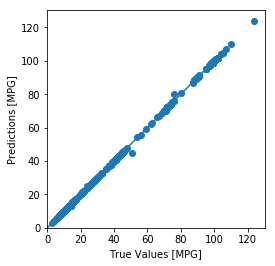

In [34]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.show()

In [35]:
test_labels[:10]

0     20
7      9
22     8
25    11
26     8
29    11
36    14
58     8
62    10
64     8
Name: DAYS_TAKEN, dtype: int64

In [36]:
test_predictions[:10]

array([19.980236 ,  8.992536 ,  7.9991517, 10.98451  ,  7.998135 ,
       10.991372 , 13.265307 ,  7.992214 ,  9.986659 ,  7.9981875],
      dtype=float32)

In [37]:
normed_test_data[:10]

,CUSTOMER,CASH_DISCOUNT_DAY1,CASH_DISCOUNT_DAY2,CASH_DISCOUNT_PER,DUE_DAYS_PLUS,T052_CASH_DISCOUNT_PER_01,AMOUNT_PERCENTAGE_CREDIT_LIMIT,T052_CASH_DISCOUNT_DAY1,T052_CASH_DISCOUNT_DAY2,DAYS_OVER_NET_DUE_DATE,...,Z281,Z286,ZD28,ZD43,ZD45,ZD48,ZD50,ZD91,ZDA4,ZDA5
0,-0.141438,-0.467441,-0.558578,-0.161041,-0.558578,-0.161041,-0.332135,-0.467441,-0.558578,1.383702,...,-0.079114,-0.256836,-0.973629,-0.025266,3.304014,-0.131136,-0.033432,-0.24826,-0.135474,-0.04379
7,-0.726557,-0.605203,-0.558578,-0.161041,-0.558578,-0.161041,-0.370362,-0.605203,-0.558578,-0.416957,...,-0.079114,-0.256836,1.026922,-0.025266,-0.302614,-0.131136,-0.033432,-0.24826,-0.135474,-0.04379
22,-0.724449,-0.605203,-0.558578,-0.161041,-0.558578,-0.161041,-0.403603,-0.605203,-0.558578,-0.580653,...,-0.079114,-0.256836,1.026922,-0.025266,-0.302614,-0.131136,-0.033432,-0.24826,-0.135474,-0.04379
25,-0.723257,-0.605203,-0.558578,-0.161041,-0.558578,-0.161041,-0.372024,-0.605203,-0.558578,-0.089564,...,-0.079114,-0.256836,1.026922,-0.025266,-0.302614,-0.131136,-0.033432,-0.24826,-0.135474,-0.04379
26,-0.723257,-0.605203,-0.558578,-0.161041,-0.558578,-0.161041,-0.381997,-0.605203,-0.558578,-0.580653,...,-0.079114,-0.256836,1.026922,-0.025266,-0.302614,-0.131136,-0.033432,-0.24826,-0.135474,-0.04379
29,-0.133733,-0.605203,-0.558578,-0.161041,-0.558578,-0.161041,-0.327149,-0.605203,-0.558578,-0.089564,...,-0.079114,-0.256836,1.026922,-0.025266,-0.302614,-0.131136,-0.033432,-0.24826,-0.135474,-0.04379
36,1.153691,-0.467441,-0.558578,-2.796990,-0.558578,-2.796990,0.274515,-0.467441,-0.558578,0.401525,...,-0.079114,-0.256836,-0.973629,39.572720,-0.302614,-0.131136,-0.033432,-0.24826,-0.135474,-0.04379
58,-0.144719,-0.605203,-0.558578,-0.161041,-0.558578,-0.161041,-0.190860,-0.605203,-0.558578,-0.580653,...,-0.079114,3.892916,-0.973629,-0.025266,-0.302614,-0.131136,-0.033432,-0.24826,-0.135474,-0.04379
62,0.618821,-0.605203,-0.558578,-0.161041,-0.558578,-0.161041,-0.267315,-0.605203,-0.558578,-0.253261,...,-0.079114,-0.256836,1.026922,-0.025266,-0.302614,-0.131136,-0.033432,-0.24826,-0.135474,-0.04379
64,-0.143593,-0.605203,-0.558578,-0.161041,-0.558578,-0.161041,-0.378672,-0.605203,-0.558578,-0.580653,...,-0.079114,-0.256836,1.026922,-0.025266,-0.302614,-0.131136,-0.033432,-0.24826,-0.135474,-0.04379


In [38]:
# creates a HDF5 file 'my_model.h5'
model.save('LRA.h5')
# Save the model architecture
with open('LRA_model_architecture.json', 'w') as f:
    f.write(model.to_json())

In [39]:
# Save Tokenizer i.e. Vocabulary
import pickle
with open('LRA_tokenizer.pickle', 'wb') as handle:
    pickle.dump(train_stats, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [46]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} DAYS_TAKEN".format(mae))

Testing set Mean Abs Error:  0.05 DAYS_TAKEN


In [48]:
scores = model.evaluate(normed_test_data, test_labels, verbose=0)

In [49]:
scores

[0.04143532247020463, 0.04824984, 0.041435324]

In [52]:
mse

0.041435324